In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [40]:
# Reads the CSV
# Creates na values
orders = pd.read_csv('/Users/ewilser/Downloads/orders.csv',na_values = ["Not Available", "unknown"])
orders['Ship Mode'].unique()
orders.head(20)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5
5,6,2022-03-13,NaN,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,FUR-FU-10001487,50,50,7,3
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,OFF-AR-10002833,10,10,4,3
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,TEC-PH-10002275,860,910,6,5
8,9,2023-03-23,NaN,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,OFF-BI-10003910,20,20,3,2
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,OFF-AP-10002892,90,110,5,3


In [42]:
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(" ","_")

In [44]:
orders["discount"]=orders["list_price"]*orders["discount_percent"]*.01
orders["sale_price"]=orders["list_price"]-orders["discount"]
orders["profit"]=orders['sale_price']-orders["cost_price"]
orders.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [30]:
orders["order_date"] = pd.to_datetime(orders["order_date"],format="%Y-%m-%d")
orders[["order_id","postal_code"]]=orders[["order_id","postal_code"]].astype(str)

In [32]:
orders.isnull().sum()

order_id            0
order_date          0
ship_mode           6
segment             0
country             0
city                0
state               0
postal_code         0
region              0
category            0
sub_category        0
product_id          0
cost_price          0
list_price          0
quantity            0
discount_percent    0
discount            0
sale_price          0
profit              0
dtype: int64

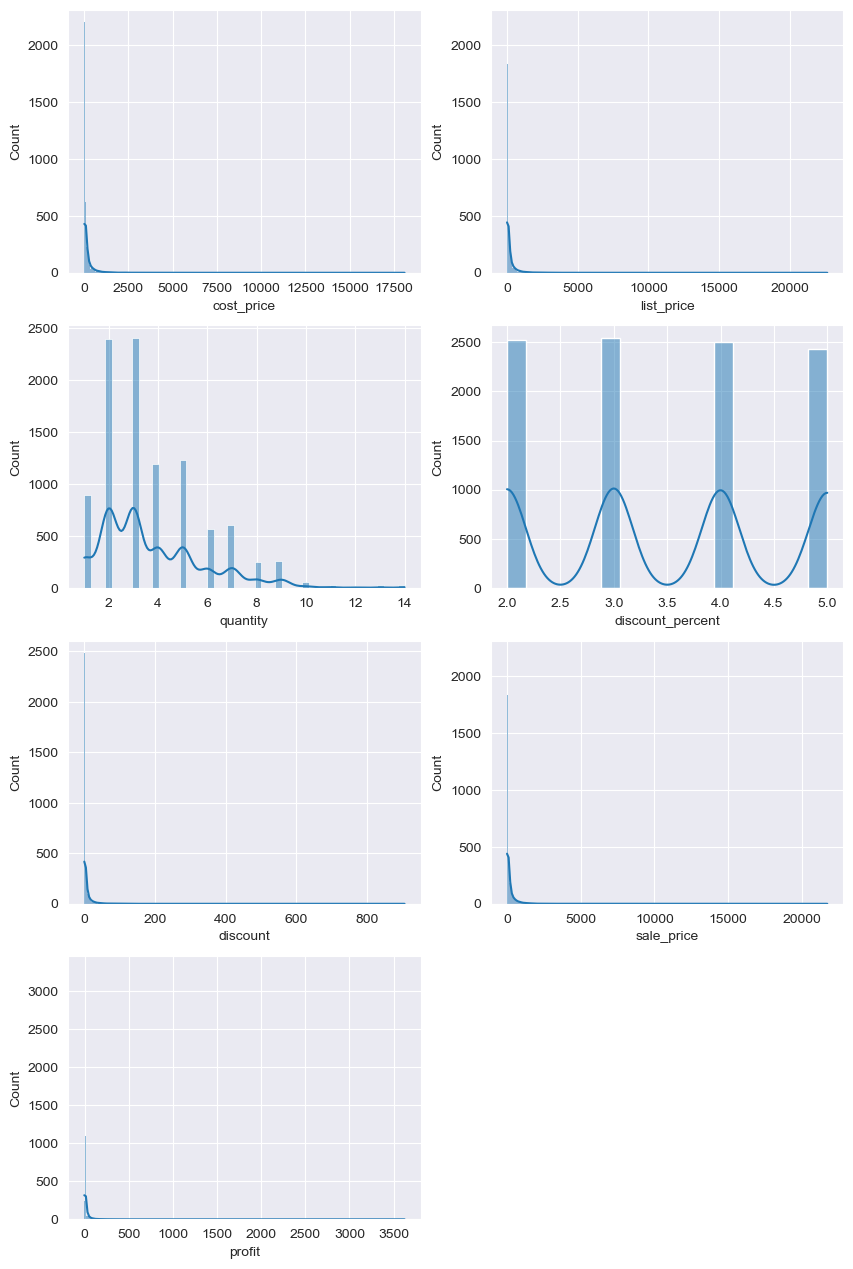

In [64]:
sns.set_style("darkgrid")

numerical_columns = ["cost_price","list_price","quantity","discount_percent","discount","sale_price","profit"]

plt.figure(figsize=(10,len(numerical_columns)*4))
for idx, feature in enumerate(numerical_columns,1):
    plt.subplot(len(numerical_columns),2,idx)
    sns.histplot(orders[feature],kde=True)
plt.savefig('OrdersData.jpeg')

In [48]:
orders.to_csv('/Users/ewilser/Downloads/orders.csv')